Import Library

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import pylab as py
from sklearn.linear_model import LinearRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn import tree, metrics
import warnings

# Import Dataset

In [ ]:
from google.colab import files
files.upload()

Saving Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx to Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx


{'Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx': b'PK\x03\x04\x14\x00\x06\x00\x08\x00\x00\x00!\x00b\xee\x9dh^\x01\x00\x00\x90\x04\x00\x00\x13\x00\x08\x02[Content_Types].xml \xa2\x04\x02(\xa0\x00\x02\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x

# Data Exploration

In [ ]:
df=pd.read_excel('Dataset Case Study 3 - Prediksi Cara Kelahiran Bayi.xlsx')

In [ ]:
print(df)

    ID  Usia  Melahirkan ke-  Waktu Melahirkan  Tekanan Darah  \
0    1    22               1                 0              2   
1    2    26               2                 0              1   
2    3    26               2                 1              1   
3    4    28               1                 0              2   
4    5    22               2                 0              1   
..  ..   ...             ...               ...            ...   
75  76    27               2                 1              1   
76  77    33               4                 0              1   
77  78    29               2                 1              2   
78  79    25               1                 2              0   
79  80    24               2                 2              1   

    Gangguan Jantung  Melahirkan Normal  
0                  0                  1  
1                  0                  0  
2                  0                  1  
3                  0                  1  
4        

In [ ]:
df.shape

(80, 7)

terdapat 80 baris dan 7 kolom

In [ ]:
df.isnull().sum()

ID                   0
Usia                 0
Melahirkan ke-       0
Waktu Melahirkan     0
Tekanan Darah        0
Gangguan Jantung     0
Melahirkan Normal    0
dtype: int64

tidak ada data kosong

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,80.0,40.5000,23.237900,1.0,20.75,40.5,60.25,80.0
Usia,80.0,27.6875,5.017927,17.0,25.00,27.0,32.00,40.0
Melahirkan ke-,80.0,1.6625,0.794662,1.0,1.00,1.0,2.00,4.0
Waktu Melahirkan,80.0,0.6375,0.815107,0.0,0.00,0.0,1.00,2.0
Tekanan Darah,80.0,1.0000,0.711568,0.0,0.75,1.0,1.25,2.0
Gangguan Jantung,80.0,0.3750,0.487177,0.0,0.00,0.0,1.00,1.0
Melahirkan Normal,80.0,0.4250,0.497462,0.0,0.00,0.0,1.00,1.0


In [ ]:
col_names = ['Usia','Melahirkan ke-','Waktu Melahirkan','Tekanan Darah','Gangguan Jantung','Melahirkan Normal']
for col in col_names:
  print(df[col].value_counts())

26    10
32     8
25     7
27     7
29     6
28     6
33     5
22     4
20     3
36     3
30     3
31     3
21     2
24     2
18     2
35     2
19     2
17     1
37     1
40     1
23     1
38     1
Name: Usia, dtype: int64
1    41
2    27
3    10
4     2
Name: Melahirkan ke-, dtype: int64
0    46
1    17
2    17
Name: Waktu Melahirkan, dtype: int64
1    40
2    20
0    20
Name: Tekanan Darah, dtype: int64
0    50
1    30
Name: Gangguan Jantung, dtype: int64
0    46
1    34
Name: Melahirkan Normal, dtype: int64


**DUPLIKASI**

Caru duplicasi untuk cek jika input variabel sama dan output variabelnya beda

In [ ]:
df['duplicated'] = df.duplicated()
df['duplicated'].value_counts()

False    80
Name: duplicated, dtype: int64

tidak ada data duplikat

In [ ]:
df = df.drop('duplicated', axis=1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80 entries, 0 to 79
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID                 80 non-null     int64
 1   Usia               80 non-null     int64
 2   Melahirkan ke-     80 non-null     int64
 3   Waktu Melahirkan   80 non-null     int64
 4   Tekanan Darah      80 non-null     int64
 5   Gangguan Jantung   80 non-null     int64
 6   Melahirkan Normal  80 non-null     int64
dtypes: int64(7)
memory usage: 4.5 KB


**Visualisasi data kesehatan dan riwayat melahirkan**

In [ ]:
df[['Usia','Melahirkan ke-','Melahirkan Normal']].describe()

,Usia,Melahirkan ke-,Melahirkan Normal
count,80.000000,80.000000,80.000000
mean,27.687500,1.662500,0.425000
std,5.017927,0.794662,0.497462
min,17.000000,1.000000,0.000000
25%,25.000000,1.000000,0.000000
50%,27.000000,1.000000,0.000000
75%,32.000000,2.000000,1.000000
max,40.000000,4.000000,1.000000


Usia berkisar dari 17 hingga 40 tahun, dengan rata-rata 27,7 tahun. Semua wanita memiliki setidaknya satu persalinan sebelumnya, rata-rata 1,66 persalinan sebelumnya dan maksimal 4 persalinan sebelumnya.

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/seab

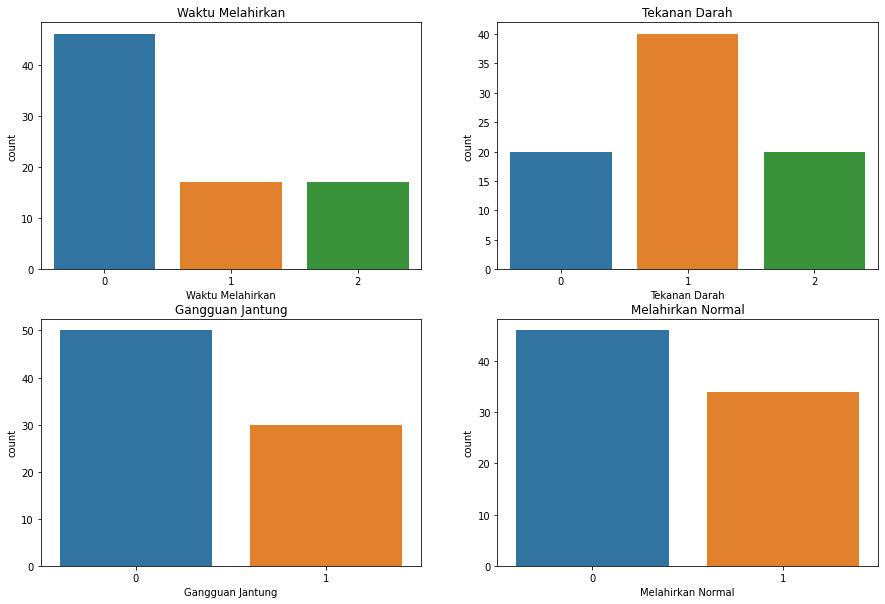

In [ ]:
# Plotting countplot

fig = plt.figure(figsize=(15,10))

fig.add_subplot(221)
plt.title('Waktu Melahirkan', fontsize=12)
sns.countplot(df['Waktu Melahirkan'])

fig.add_subplot(2,2,2)
plt.title('Tekanan Darah', fontsize=12)
sns.countplot(df['Tekanan Darah'])

fig.add_subplot(223)
plt.title('Gangguan Jantung', fontsize=12)
sns.countplot(df['Gangguan Jantung'])

fig.add_subplot(2,2,4)
plt.title('Melahirkan Normal', fontsize=12)
sns.countplot(df['Melahirkan Normal'])

plt.show()

Hampir 50% ibu hamil memiliki tekanan darah normal. Jumlah wanita dengan tekanan darah rendah dan tinggi berada dalam urutan yang sama besarnya.
50% wanita memiliki tepat satu persalinan sebelumnya.
Lebih dari 50% wanita hamil memiliki waktu persalinan tepat waktu. Jumlah wanita dengan waktu persalinan prematur dan terlambat berada dalam urutan yang sama besarnya.
Mayoritas wanita tidak memiliki masalah jantung.
Sebagian besar wanita menjalani operasi caesar (57,5%).



In [ ]:
df.describe()

,ID,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung,Melahirkan Normal
count,80.0000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000
mean,40.5000,27.687500,1.662500,0.637500,1.000000,0.375000,0.425000
std,23.2379,5.017927,0.794662,0.815107,0.711568,0.487177,0.497462
min,1.0000,17.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,20.7500,25.000000,1.000000,0.000000,0.750000,0.000000,0.000000
50%,40.5000,27.000000,1.000000,0.000000,1.000000,0.000000,0.000000
75%,60.2500,32.000000,2.000000,1.000000,1.250000,1.000000,1.000000
max,80.0000,40.000000,4.000000,2.000000,2.000000,1.000000,1.000000


Missing Data

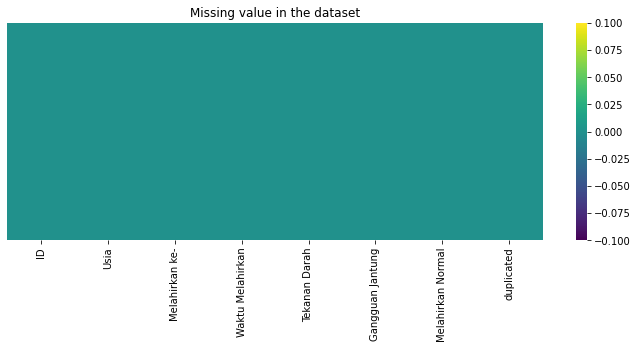

In [ ]:
plt.figure(figsize=(12,4))
sns.heatmap(df.isnull(),cbar=True,cmap="viridis",yticklabels=False)
plt.title('Missing value in the dataset');

HeatMap

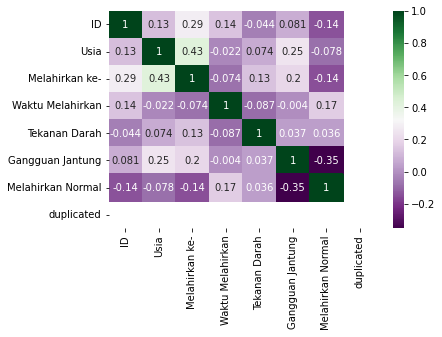

In [ ]:
sns.heatmap(df.corr(),cmap='PRGn',annot=True)

**periksa hubungan antara usia dan jumlah persalinan sebelumnya**

<Figure size 1008x432 with 0 Axes>

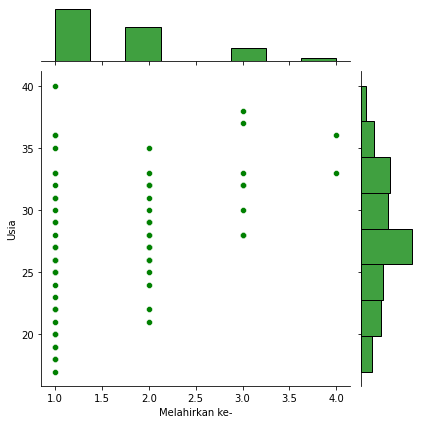

In [ ]:
p= plt.figure(figsize=(14,6))
sns.jointplot(y='Usia',x='Melahirkan ke-',data=df,color="Green")

semakin muda wanita, semakin rendah jumlah persalinan sebelumnya

**Usia vs Persalinan normal**

<Figure size 720x576 with 0 Axes>

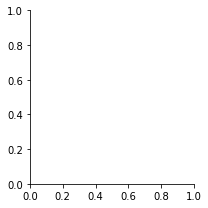

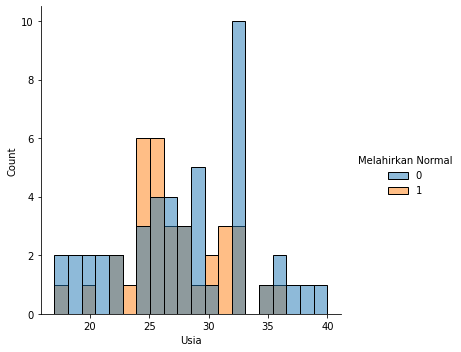

In [ ]:
fig = plt.figure(figsize=(10,8))
title = fig.suptitle("C-section according to age and prior number of deliveries", fontsize=14)

sns.FacetGrid(data=df,
                  hue='Melahirkan Normal',
                  palette={1: "orange", 0: "blue"})

sns.displot(data=df, x='Usia', hue='Melahirkan Normal', bins=20,
                      fill=True)

Ada banyak kasus wanita berusia sekitar 25 tahun yang tidak menjalani operasi caesar, sementara banyak kasus wanita berusia 32 tahun yang menjalani operasi caesar. Wanita di atas 36 tahun semuanya menjalani operasi caesar.

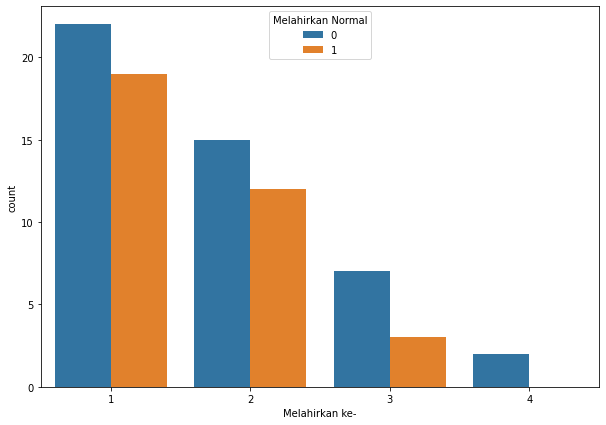

In [ ]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df,
                   x="Melahirkan ke-",
                   hue="Melahirkan Normal")

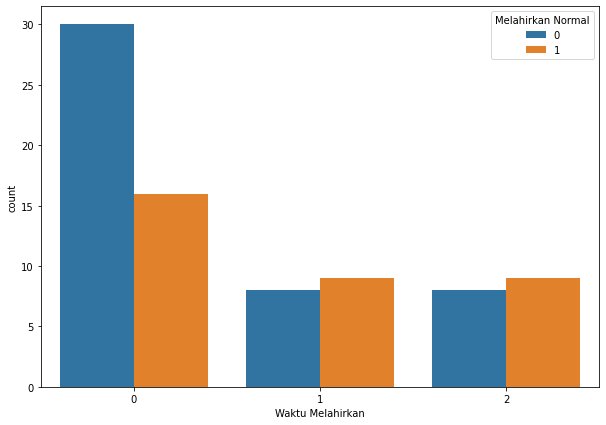

In [ ]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df,
                   x="Waktu Melahirkan",
                   hue="Melahirkan Normal")

Kemunculan operasi caesar lebih tinggi saat waktu persalinan tepat waktu (0), sedangkan hampir seimbang saat prematur (1) atau terlambat (2). Saya akan berpikir bahwa pengiriman waktu yang terlambat akan memiliki lebih banyak operasi caesar.

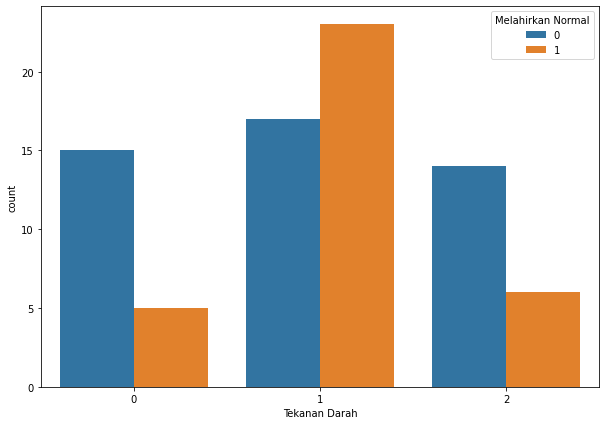

In [ ]:
fig = plt.figure(figsize=(10, 7))

cp = sns.countplot(data=df,
                   x="Tekanan Darah",
                   hue="Melahirkan Normal")

Terjadinya operasi caesar lebih besar ketika ibu hamil memiliki tekanan darah rendah (0) atau tekanan darah tinggi (2) pada sampel ini. Kedua kondisi ini tampaknya memengaruhi kebutuhan operasi caesar.

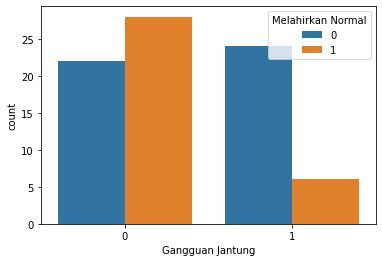

In [ ]:
cp = sns.countplot(data=df,
                   x="Gangguan Jantung",
                   hue="Melahirkan Normal")

Terjadinya operasi caesar jauh lebih besar ketika ibu hamil memiliki masalah jantung, yang tampaknya wajar.

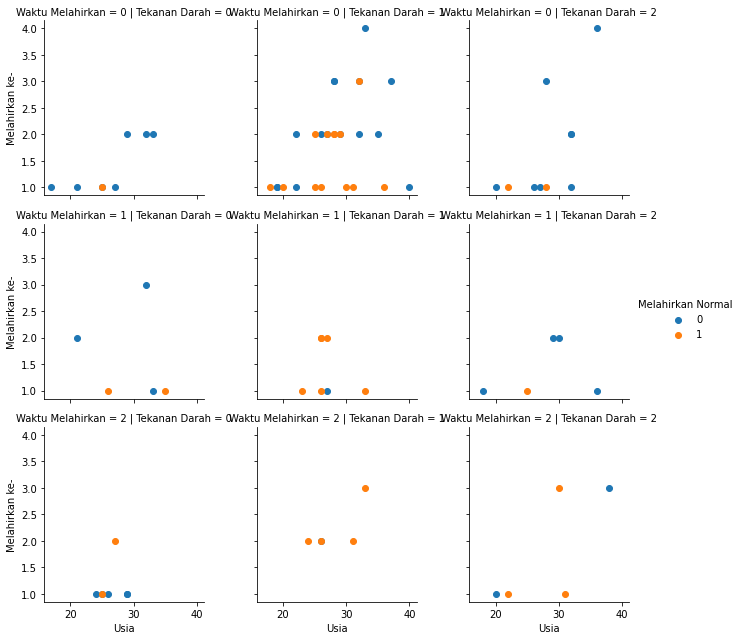

In [ ]:
g = sns.FacetGrid(df, col="Tekanan Darah",  row="Waktu Melahirkan",hue='Melahirkan Normal')
g = g.map(plt.scatter, "Usia", "Melahirkan ke-").add_legend()

* Tekanan darah rendah tampaknya berkorelasi positif dengan kebutuhan operasi caesar.
> * Semua wanita hamil dengan tekanan darah rendah dan waktu melahirkan tepat waktu menjalani operasi caesar.
> * Sebagian besar wanita hamil dengan tekanan darah rendah dan waktu persalinan prematur atau terlambat menjalani operasi caesar.

* Sebagian besar wanita hamil dengan tekanan darah tinggi dan persalinan prematur atau tepat waktu menjalani operasi caesar. Kebutuhan operasi caesar lebih seimbang untuk ibu hamil dengan tekanan darah tinggi dan waktu melahirkan yang terlambat.
* Saya asumsi bahwa wanita hamil dengan waktu persalinan yang terlambat dan tekanan darah tinggi akan memiliki proporsi yang sama atau bahkan jumlah operasi caesar yang lebih tinggi daripada wanita hamil dengan waktu persalinan prematur atau tepat waktu dan tekanan darah tinggi.
* Dalam kasus tekanan darah normal, sebagian besar operasi caesar diamati untuk persalinan tepat waktu. Ini mungkin terkait dengan masalah kesehatan lainnya (misalnya masalah jantung) atau ukuran kumpulan data.
* 9 dari 22 wanita hamil dengan tekanan darah normal dan waktu persalinan tepat waktu menjalani operasi caesar
* Satu dari 6 wanita hamil dengan tekanan darah normal dan waktu persalinan prematur menjalani operasi caesar.
* Satu dari 4 wanita hamil dengan tekanan darah normal dan waktu persalinan terlambat menjalani operasi caesar.*

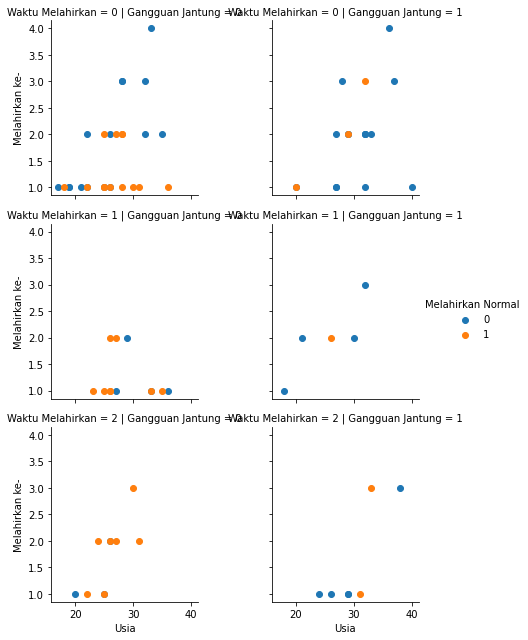

In [ ]:
g = sns.FacetGrid(df, col="Gangguan Jantung",  row="Waktu Melahirkan",hue='Melahirkan Normal')
g = g.map(plt.scatter, "Usia", "Melahirkan ke-").add_legend()

# Data Pre-Processing

Karena tidak memiliki nilai yang hilang dalam kumpulan data. Jadi kami akan melanjutkan tanpa membuat perubahan apa pun.

Sekarang kita akan membagi dataset kita menjadi nilai fitur[X] dan nilai target[Y] dan menormalkan fitur.

In [ ]:
X=df.iloc[:,1:-1]
X=X.values
Y=df.iloc[:,-1].values

X hanya menggunakan Waktu Melahirkan ke-,Waktu Melahirkan,	Tekanan Darah,	Gangguan Jantung,	Melahirkan Normal

In [ ]:
print(X)

[[22  1  0  2  0]
 [26  2  0  1  0]
 [26  2  1  1  0]
 [28  1  0  2  0]
 [22  2  0  1  0]
 [26  1  1  0  0]
 [27  2  0  1  0]
 [32  3  0  1  0]
 [28  2  0  1  0]
 [27  1  1  1  0]
 [36  1  0  1  0]
 [33  1  1  0  0]
 [23  1  1  1  0]
 [20  1  0  1  1]
 [29  1  2  0  1]
 [25  1  2  0  0]
 [25  1  0  1  0]
 [20  1  2  2  0]
 [37  3  0  1  1]
 [24  1  2  0  1]
 [26  1  1  1  0]
 [33  2  0  0  1]
 [25  1  1  2  0]
 [27  1  0  0  1]
 [20  1  0  2  1]
 [18  1  0  1  0]
 [18  1  1  2  1]
 [30  1  0  1  0]
 [32  1  0  2  1]
 [26  2  1  1  1]
 [25  1  0  0  0]
 [40  1  0  1  1]
 [32  2  0  2  1]
 [27  2  0  1  1]
 [26  2  2  1  0]
 [28  3  0  2  0]
 [33  1  1  1  0]
 [31  2  2  1  0]
 [31  1  0  1  0]
 [26  1  2  0  1]
 [27  1  0  2  1]
 [19  1  0  1  0]
 [36  1  1  2  0]
 [22  1  0  1  0]
 [36  4  0  2  1]
 [28  3  0  1  1]
 [26  1  0  1  0]
 [32  2  0  2  1]
 [26  2  2  1  0]
 [29  2  0  0  1]
 [33  3  2  1  1]
 [21  2  1  0  1]
 [30  3  2  2  0]
 [35  1  1  0  0]
 [29  2  0  1  1]
 [25  2  0

Data preprocessing : dilakukan normalisasi/standarisasi z-score dengan menggunakan fungsi StandardScaler kemudian hasilnya disimpan sebagai sebuah dataframe dengan nama “X1” (standardized attibutes)

In [ ]:
from sklearn import preprocessing
X1= preprocessing.normalize(X)
print(X1)

[[0.99487439 0.04522156 0.         0.09044313 0.        ]
 [0.99632216 0.07664017 0.         0.03832008 0.        ]
 [0.99559146 0.07658396 0.03829198 0.03829198 0.        ]
 [0.9968264  0.03560094 0.         0.07120189 0.        ]
 [0.99487439 0.09044313 0.         0.04522156 0.        ]
 [0.99852398 0.03840477 0.03840477 0.         0.        ]
 [0.99658819 0.07382135 0.         0.03691067 0.        ]
 [0.99515266 0.09329556 0.         0.03109852 0.        ]
 [0.9968264  0.07120189 0.         0.03560094 0.        ]
 [0.99794872 0.03696106 0.03696106 0.03696106 0.        ]
 [0.99922929 0.02775637 0.         0.02775637 0.        ]
 [0.99908299 0.03027524 0.03027524 0.         0.        ]
 [0.99717646 0.0433555  0.0433555  0.0433555  0.        ]
 [0.99627096 0.04981355 0.         0.04981355 0.04981355]
 [0.99645179 0.03436041 0.06872081 0.         0.03436041]
 [0.99602384 0.03984095 0.07968191 0.         0.        ]
 [0.99840383 0.03993615 0.         0.03993615 0.        ]
 [0.98893635 0

Normalisasi mengacu pada penskalaan ulang atribut numerik bernilai nyata ke dalam rentang 0 dan 1. Berguna untuk menskalakan atribut input untuk model yang bergantung pada besaran nilai, seperti ukuran jarak yang digunakan dalam k-tetangga terdekat dan dalam persiapan koefisien regresi.

# Model Building

Kami sekarang akan membagi set data menjadi pelatihan dan pengujian sehingga kami dapat memasukkan set data kami ke dalam model dan melatih model kami menggunakan set pelatihan dan kemudian menguji model terlatih kami menggunakan set pengujian.

Di sini saya telah membagi kumpulan data sebagai pelatihan- 75% dan pengujian- 25%. test_size=0.25 menunjukkan 75% pelatihan dan 25% pengujian.

In [ ]:
X = df.drop(['ID','Melahirkan Normal'], axis=1)
y = df['Melahirkan Normal']

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.25,
                                                    random_state = 42)

In [ ]:
print("X_train:",X_train.shape)
print("X_test:",X_test.shape)
print("y_train:",y_train.shape)
print("y_test:",y_test.shape)

X_train: (60, 5)
X_test: (20, 5)
y_train: (60,)
y_test: (20,)


In [ ]:
X_train.head()

,Usia,Melahirkan ke-,Waktu Melahirkan,Tekanan Darah,Gangguan Jantung
9,27,1,1,1,0
64,31,1,2,2,1
5,26,1,1,0,0
47,32,2,0,2,1
34,26,2,2,1,0


In [ ]:
from sklearn.tree import DecisionTreeClassifier
Tree=DecisionTreeClassifier(criterion='entropy')
Tree.fit(X_train,y_train)



DecisionTreeClassifier(criterion='entropy')

In [ ]:
predTree_train=Tree.predict(X_train)
hasil_train=pd.DataFrame ({'Predicted_risk': predTree_train,'Actual_risk': y_train})
hasil_train.head()

,Predicted_risk,Actual_risk
9,0,0
64,1,1
5,1,1
47,0,0
34,0,0


In [ ]:
predTree_test=Tree.predict(X_test)
hasil_test=pd.DataFrame ({'Predicted_risk': predTree_test,'Actual_risk': y_test})
hasil_test.head()

,Predicted_risk,Actual_risk
30,1,1
0,0,1
22,1,1
31,1,0
18,0,0


In [ ]:
plt.figure(figsize=(12,8))

<Figure size 864x576 with 0 Axes>

<Figure size 864x576 with 0 Axes>

In [ ]:
from sklearn. tree import DecisionTreeClassifier
from sklearn. metrics import accuracy_score
from sklearn import tree
clf_en = DecisionTreeClassifier (criterion = "entropy", random_state = 10,max_depth=3, min_samples_leaf=5)
clf_en.fit(X_train, y_train)
y_pred = clf_en.predict(X_test)
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred)*100


55.00000000000001

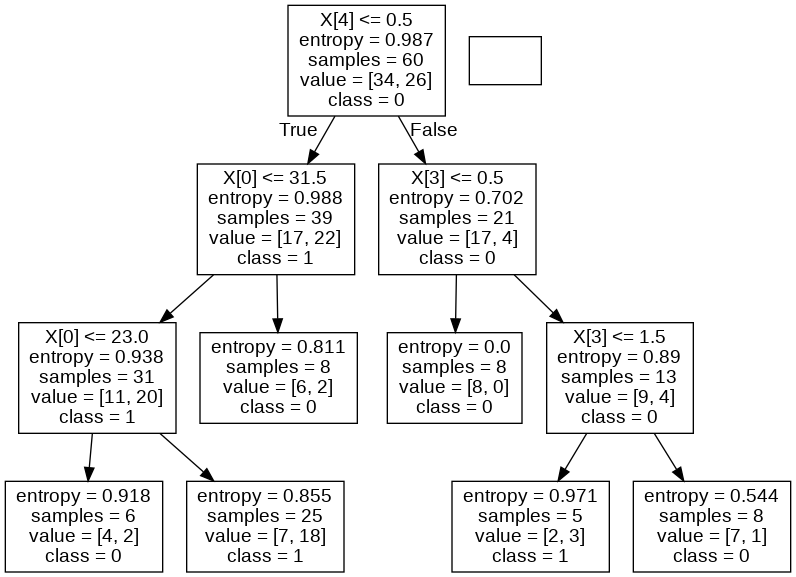

In [ ]:
import pydotplus
from sklearn. tree import export_graphviz
from IPython. display import Image
dot_data = tree.export_graphviz(clf_en, class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data)
Image (graph.create_png())

## **evaluasi model**

In [ ]:
def plot_confusionmatrix(y_train_pred,y_train,dom):
    print(f'{dom} Confusion matrix')
    cf = confusion_matrix(y_train_pred,y_train)
    sns.heatmap(cf,annot=True,cmap='Blues', fmt='g')
    plt.tight_layout()
    plt.show()

Train score 0.9666666666666667
Test score 0.65
Train Confusion matrix


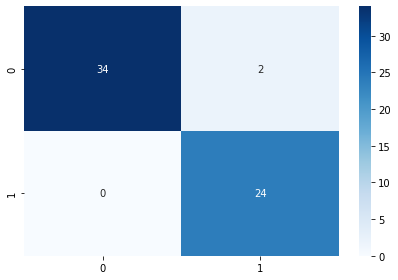

Test Confusion matrix


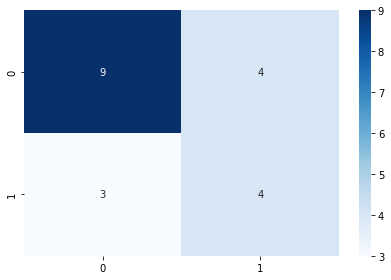

In [ ]:
print(f'Train score {accuracy_score(predTree_train,y_train)}')
print(f'Test score {accuracy_score(predTree_test,y_test)}')
plot_confusionmatrix(predTree_train,y_train,dom='Train')
plot_confusionmatrix(predTree_test,y_test,dom='Test')

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_train, predTree_train))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97        34
           1       1.00      0.92      0.96        26

    accuracy                           0.97        60
   macro avg       0.97      0.96      0.97        60
weighted avg       0.97      0.97      0.97        60



In [ ]:
print(classification_report(y_test, predTree_test))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        12
           1       0.57      0.50      0.53         8

    accuracy                           0.65        20
   macro avg       0.63      0.62      0.63        20
weighted avg       0.64      0.65      0.65        20



terjadi overfitting pada data, perlu dilakukan prunning

## **menentukan validasi silang dengan k-fold cross validation**

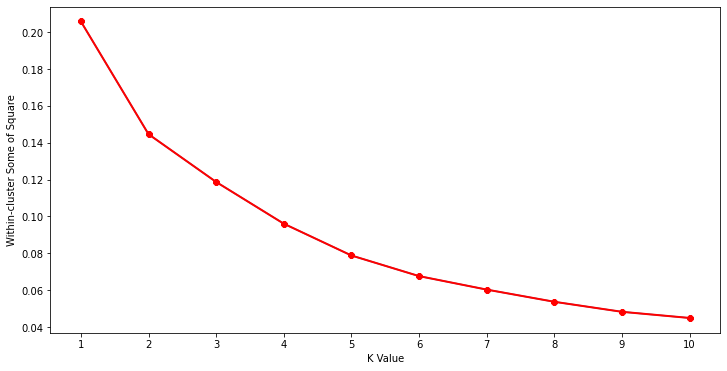

In [ ]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  km=KMeans(n_clusters=i)
  km.fit(X1)
  wcss.append(km.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),wcss)
plt.plot(range(1,11),wcss,linewidth=2,color="red",marker="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Within-cluster Some of Square")
plt.show()

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f4b726f5df0>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=6, random_state=42))

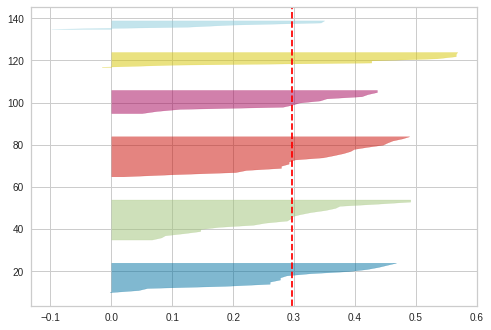

In [ ]:
from yellowbrick.cluster import SilhouetteVisualizer
model=KMeans(6,random_state=42)
visualizer=SilhouetteVisualizer(model,colors='yellowbrick')
visualizer.fit(X1)

SilhouetterScore : 0.324
For n_clusters=2, Silhouette coeffecient = 0.2862065040590155
For n_clusters=3, Silhouette coeffecient = 0.23003865521248157
For n_clusters=4, Silhouette coeffecient = 0.26165148081682393
For n_clusters=5, Silhouette coeffecient = 0.2834343739313951
For n_clusters=6, Silhouette coeffecient = 0.29511998102999115
For n_clusters=7, Silhouette coeffecient = 0.3125433802488967
For n_clusters=8, Silhouette coeffecient = 0.3121833071848651
For n_clusters=9, Silhouette coeffecient = 0.34196824112935337


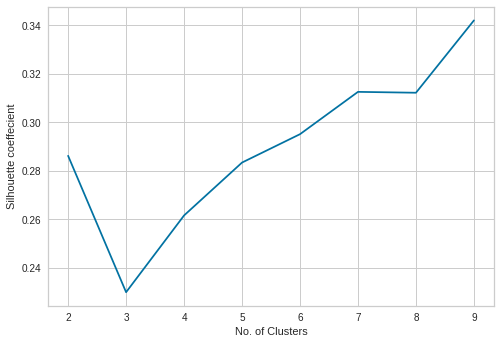

In [ ]:
from sklearn.metrics import silhouette_score
km=KMeans(n_clusters=8,random_state=42)
km.fit(X1)
score=silhouette_score(X1,km.labels_)
print('SilhouetterScore : %.3f' % score)

from sklearn.metrics import silhouette_score
k_cluster = []
sil_coeffecients = []

for n_cluster in range(2,10):
  kmeans = KMeans(n_clusters=n_cluster).fit(X1)
  label = kmeans.labels_
  sil_coeff = silhouette_score(X1, label)
  print("For n_clusters={}, Silhouette coeffecient = {}".format(n_cluster , sil_coeff))
  sil_coeffecients.append(sil_coeff)
  k_cluster.append(n_cluster)

plt.plot(k_cluster,sil_coeffecients)
plt.ylabel('Silhouette coeffecient')
plt.xlabel('No. of Clusters')
plt.show()

In [ ]:
model=KMeans(init="random",n_clusters=6)
model.fit(X1)
print('inertia:',model.inertia_)
print('cluster_centroids:',model.cluster_centers_)

inertia: 0.07017300131081897
cluster_centroids: [[9.95019409e-01 4.76798069e-02 1.06603350e-02 7.53123487e-02
  2.64857421e-02]
 [9.98203688e-01 5.04412764e-02 1.06926365e-02 0.00000000e+00
  1.10570201e-02]
 [9.95399804e-01 4.95517168e-02 7.21576738e-02 0.00000000e+00
  2.44703129e-02]
 [9.95112256e-01 8.63029577e-02 3.46944695e-18 3.80189014e-02
  1.43216431e-02]
 [9.93414342e-01 7.06867527e-02 6.27983406e-02 5.23936410e-02
  9.04322972e-03]
 [9.98101321e-01 3.97505050e-02 1.10417573e-02 3.97005301e-02
  1.56103721e-03]]


In [ ]:
clt=model.labels_
hasil=pd.Series(clt,name="Cluster")
hasil=pd.DataFrame(hasil)
hasil

,Cluster
0,0
1,3
2,4
3,0
4,3
...,...
75,4
76,3
77,4
78,2


/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


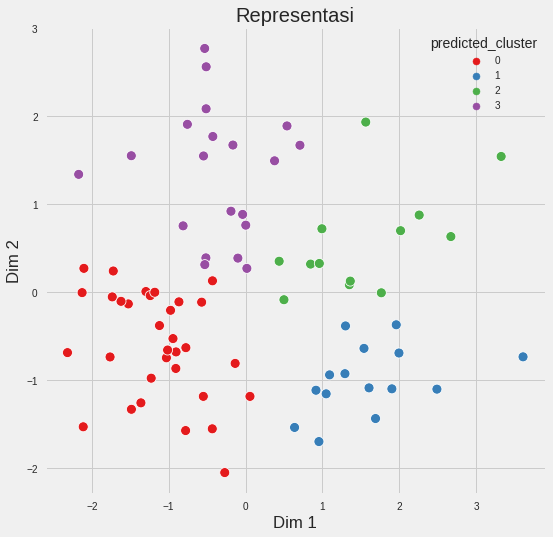

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
preprocessor=Pipeline([("scaler",StandardScaler()),("pca",PCA(n_components=2,random_state=42)),])
clusterer=Pipeline([("kmeans",KMeans(n_clusters=4,init="k-means++",n_init=50,max_iter=500,random_state=42,),),])
pipe=Pipeline([("preprocessor",preprocessor),("clusterer",clusterer)])
pipe.fit(df)

preprocessor_data=pipe["preprocessor"].transform(df)
predicted_labels=pipe["clusterer"]["kmeans"].labels_

pcadf=pd.DataFrame(pipe["preprocessor"].transform(df),columns=["Dim 1","Dim 2"],)
pcadf["predicted_cluster"]=pipe["clusterer"]["kmeans"].labels_

plt.style.use("fivethirtyeight")
plt.figure(figsize=(8,8))
scat=sns.scatterplot("Dim 1","Dim 2", s=100,data=pcadf,hue="predicted_cluster", palette="Set1")
scat.set_title("Representasi")
plt.show()

** validasi silang dengan 8-fold cross validation**

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

cv = KFold(n_splits=8, random_state=1, shuffle=True)
scores = cross_val_score(Tree, X, y, scoring='accuracy', cv=cv, n_jobs=-1)

In [ ]:
print('Accuracy scores of each fold: ', scores)
print('Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))

Accuracy scores of each fold:  [0.5 0.5 0.5 0.3 0.8 0.7 0.6 0.7]
Accuracy: 0.575 (0.148)


melakukan prunning

In [ ]:
clf = DecisionTreeClassifier(random_state=0)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06351648351648354


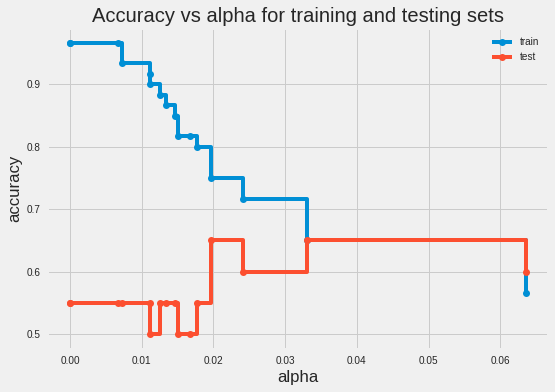

In [ ]:
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]

fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker="o", label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker="o", label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

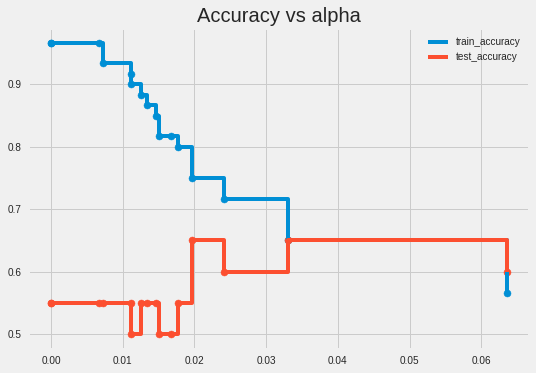

In [ ]:
train_acc = []
test_acc = []
for c in clfs:
    y_train_pred = c.predict(X_train)
    y_test_pred = c.predict(X_test)
    train_acc.append(accuracy_score(y_train_pred,y_train))
    test_acc.append(accuracy_score(y_test_pred,y_test))

plt.scatter(ccp_alphas,train_acc)
plt.scatter(ccp_alphas,test_acc)
plt.plot(ccp_alphas,train_acc,label='train_accuracy',drawstyle="steps-post")
plt.plot(ccp_alphas,test_acc,label='test_accuracy',drawstyle="steps-post")
plt.legend()
plt.title('Accuracy vs alpha')
plt.show()

In [ ]:
Tree_prun=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.02)
Tree_prun.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02, criterion='entropy')

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

Number of nodes in the last tree is: 1 with ccp_alpha: 0.06351648351648354


Train score 0.65
Test score 0.65
Train Confusion matrix


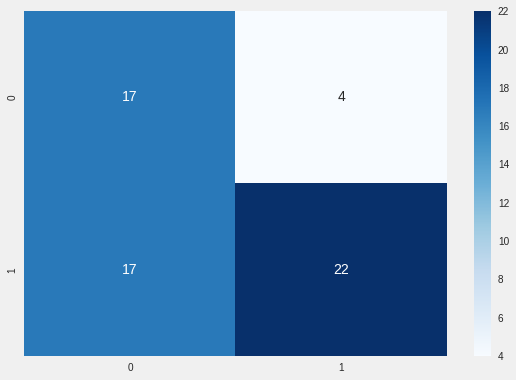

Test Confusion matrix


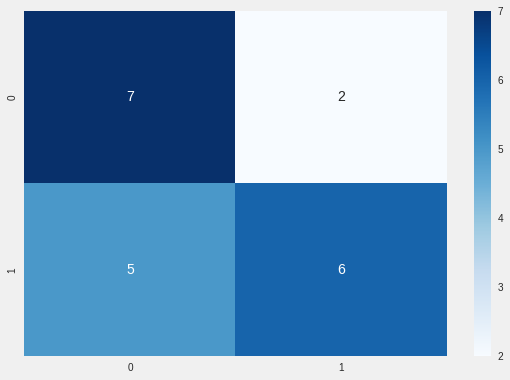

In [ ]:
clf_ = tree.DecisionTreeClassifier(random_state=0,ccp_alpha=0.063)
clf_.fit(X_train,y_train)
predTree_train_prun = clf_.predict(X_train)
predTree_test_prun = clf_.predict(X_test)

print(f'Train score {accuracy_score(predTree_train_prun,y_train)}')
print(f'Test score {accuracy_score(predTree_test_prun,y_test)}')
plot_confusionmatrix(predTree_train_prun,y_train,dom='Train')
plot_confusionmatrix(predTree_test_prun,y_test,dom='Test')

In [ ]:
Tree_prun=DecisionTreeClassifier(criterion='entropy',ccp_alpha=0.05)
Tree_prun.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.05, criterion='entropy')

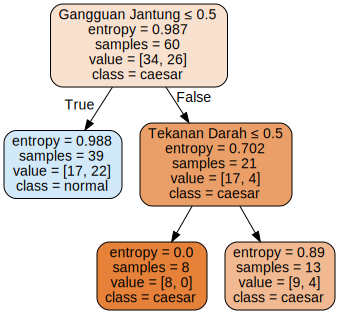

In [ ]:
import graphviz
dot_data=tree.export_graphviz(Tree_prun,out_file=None,
                              feature_names=X_train.columns,
                              class_names=['caesar','normal'],
                              filled=True,rounded=True,
                              special_characters=True)
graph = graphviz.Source(dot_data)
graph



Kita dapat melihat bahwa ukuran decision tree berkurang secara signifikan. Juga postpruning jauh lebih efisien daripada prepruning.

***Model Regresi Linear***

In [ ]:
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (60, 5)
Shape of X_test:  (20, 5)
Shape of y_train:  (60,)
Shape of y_test (20,)


In [ ]:
from sklearn.linear_model import LinearRegression
model_regresi = LinearRegression()
model_regresi.fit(X_train,y_train)
print(pd.DataFrame({'Predictor': X.columns, 'coefficient': model_regresi.coef_}))

          Predictor  coefficient
0              Usia    -0.001561
1    Melahirkan ke-    -0.053588
2  Waktu Melahirkan     0.104459
3     Tekanan Darah     0.042675
4  Gangguan Jantung    -0.375436


In [ ]:
y_pred_train=model_regresi.predict(X_train)
hasil_train = pd.DataFrame({'Predicted_price': y_pred_train, 'Actual_price': y_train,
'Residual': y_train - y_pred_train})
print(hasil_train.head(20))

    Predicted_price  Actual_price  Residual
9          0.621547             0 -0.621547
64         0.387000             1  0.613000
5          0.580433             1  0.419567
47         0.122932             0 -0.122932
34         0.673979             0 -0.673979
62         0.413017             0 -0.413017
42         0.650170             0 -0.650170
54         0.084940             0 -0.084940
16         0.520210             1  0.479790
39         0.309456             0 -0.309456
56         0.088452             0 -0.088452
79         0.677102             1  0.322898
7          0.402104             0 -0.402104
50         0.234025             1  0.765975
53         0.566380             1  0.433620
19         0.312578             0 -0.312578
66         0.408350             0 -0.408350
25         0.531140             1  0.468860
44         0.009510             0 -0.009510
13         0.152581             1  0.847419


In [ ]:
from sklearn.metrics import r2_score
y_pred_train = model_regresi.predict(X_train)
r2_score_train = r2_score(y_train, y_pred_train)

y_pred_test = model_regresi.predict(X_test)
r2_score_test = r2_score(y_test, y_pred_test)


from sklearn.metrics import mean_squared_error
rmse_train = (np.sqrt(mean_squared_error(y_train, y_pred_train)))
rmse_test = (np.sqrt(mean_squared_error(y_test, y_pred_test)))

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
folds = KFold(n_splits = 6, shuffle = True, random_state = 100)
cross_val = cross_val_score(estimator = model_regresi, X = X, y = y, cv =folds)

In [ ]:
X_const_train=sm.add_constant(X_train)
modelsm= sm.OLS(y_train, X_const_train).fit()
modelsm.summary()

/usr/local/lib/python3.8/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Melahirkan Normal   R-squared:                       0.171
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2.235
Date:                Sun, 15 Jan 2023   Prob (F-statistic):             0.0639
Time:                        16:11:43   Log-Likelihood:                -37.367
No. Observations:                  60   AIC:                             86.73
Df Residuals:                      54   BIC:                             99.30
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.5702      0.385      1.482      0.144      -0.201       1.341
Usia                -0.0016      0.015     -0.105      0.917      -0.031       0.028
Melahirkan ke-      -0.0536      0.091     -0.590      0.558      -0.236       0.128
Waktu Melahirkan     0.1045      0.073      1.424      0.160      -0.043       0.252
Tekanan Darah        0.0427      0.087      0.490      0.626      -0.132       0.217
Gangguan Jantung    -0.3754      0.130     -2.877      0.006      -0.637      -0.114
==============================================================================
Omnibus:                       26.613   Durbin-Watson:                   2.201
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                4.442
Skew:                           0.063   Prob(JB):                        0.108
Kurtosis:                       1.673   Cond. No.                         178.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""